## Introduction
The sigmoidal fit has 3 parameters (GRinf, hGR, and GEC50). Some drugs are associated with a biphasic response that cannot be properly fitted using a single 3-parameter sigmoidal curve. A biphasic fit is a combination of 2 sigmoidal curves that fit the early and late (low or high dose) response. An example of such a response is provided below (dark blue curve), where the measured dose response is best fit by a biphasic model that captures the early (light blue) and late (black line) declines in GR values. In contrast a simple sigmoidal fit is sufficient to explain the dose-response curve in red.

 
![title](biphasic.png)

The script below computes and plots two sigmoidal fits (1st and 2nd phase) and  a biphasic fit on dose response data for a given drug and center. For each fit, the R-squared error is computed to idenitfy the best fit. The computation draws from `datarail` - a computational package that faciliates easy and reprodible design and analyses of dose response experiments. 

## Instructions
1. Install anaconda for python 3.7 and git. Instructions are available on https://github.com/smkartik/datarail.github.io/blob/master/README.md
2. Install the datarail package from the terminal. You can copy and paste the lines of code below into a terminal:
```
    mkdir git_repos
    cd git_repos
    git clone https://github.com/datarail/datarail.git
    pip install -e datarail    
```    
3. Open Jupyter either by clicking on its icon, or by typing jupyter notebook in a terminal. This will open up Jupyter in your web browser.

4. Navigate to the folder where you downloaded the .ipynb file and the data files.

5. To run the sript, replace `Palbociclib` and `Center 2` with the desired drug and center in the code block below. Then click on `Cell` in the menu bar and `Run all`


In [11]:
drug='Palbociclib'
center='Center 2'

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datarail.experimental_design import dr_fits as dfit


In [13]:
def plot_fits_summary(df, agent, center, ax=None):
    ds = df.groupby(['center', 'agent', 'concentration'],
                as_index=False)['GRvalue'].mean()

    cmin = np.log10(ds.concentration.min())
    cmax = np.log10(ds.concentration.max())
    xc = 10 ** np.arange(cmin, cmax, 0.01)
    
    dca = ds[(ds.agent == agent) & (ds.center == center)].copy()
    xdata = dca['concentration'].tolist()
    ydata = dca['GRvalue'].tolist()
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))
    _, fit_params, _, _ = dfit.fit(xdata, ydata, ax=ax1, fig_title=center)
    ax1.set_xlabel('concentration (\u03bcM)', fontsize=15)
    ax1.set_ylabel('GR value', fontsize=15)
    ax1.set_ylim((-0.5, 1.1))
    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend(handles, labels)
    plot_biphasic_fits(ds, agent, center, ax=ax2)
    ax2.set_xlabel('concentration (\u03bcM)', fontsize=15)
    plt.subplots_adjust(wspace=0.5)
    
    
def plot_biphasic_fits(ds, agent, center, ax=None): 
    cmin = np.log10(ds.concentration.min())
    cmax = np.log10(ds.concentration.max())
    xc = 10 ** np.arange(cmin, cmax, 0.01)
    dca = ds[(ds.agent == agent) & (ds.center == center)].copy()
    xdata = dca['concentration'].tolist()
    ydata = dca['GRvalue'].tolist()
    _, params, _, _ = dfit.fit(xdata, ydata)

    
    params1 = np.copy(params)
    params2 = np.copy(params)
    params1[1] = -np.inf
    params2[4] = -np.inf

    yf = dfit.biphasic_fit_function(xc, *params)
    yf1 = dfit.biphasic_fit_function(xc, *params1)
    yf2 = dfit.biphasic_fit_function(xc, *params2)
    

    if ax is None:
        fig, ax = plt.subplots()
    ax.semilogx(xc, yf, 'b', label='biphasic fit')
    ax.semilogx(xc, yf1, '-k', label='nominal fit')
    ax.semilogx(xc, yf2, '--k', label='non-nominal fit')
    ax.semilogx(xdata, ydata, 'or', label='measure GR value')
    xlim = [10 ** cmin, 10 ** cmax]
    ax.plot(xlim, [0, 0], '--k', alpha=0.5)
    ax.set_xlim(xlim)
    ax.set_ylim((-0.5, 1.1))
    ax.set_title(center)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)

In [14]:
df = pd.read_csv('grvalues_merged.csv')

2nd phase sigmoidal fit is the better of the 2 sigmoidal fits
2nd phase sigmoidal fit is the better of the 2 sigmoidal fits


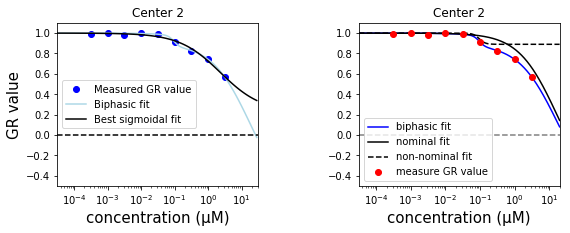

In [15]:
plot_fits_summary(df, drug, center)